# CAR PRICE PREDICTION

# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the Dataset

In [3]:
raw_data = pd.read_csv("Car_Prices.csv")

#looking at the top 5 rows
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Data Pre-Processing

In [4]:
#Glancing at the summary of raw_data
raw_data.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# Model column is of no use to use,spo dropping the column would be better for our model

raw_data.drop(['Model'],axis=1,inplace=True)

In [8]:
#checking the number of null values in our raw data, there are 172 and 150 null values in Price and EngineV respectively.

raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [23]:
# Dropping all rows which contain null values (in this case,it is ok to delete null value rows because the data is less then
# 5%)

data = raw_data.dropna(axis=0)

In [24]:
#checking if all the null values are cleared
raw_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [25]:
# checking status again after dropping all the null values
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Checking unique values in categorical columns

In [29]:
data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [30]:
data['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [31]:
data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

Displaying the PDF (Probability distribution Fucntion of the Price Variable) ,it helps us to spot anomolies

<Axes: xlabel='Price', ylabel='Count'>

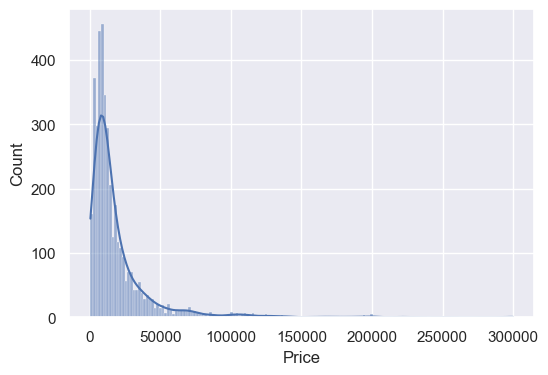

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

sns.histplot(data['Price'],kde=True,ax=ax)

In [51]:
# From the above hist plot we can see that there are few outliers,so removing those outliers will be a good idea
# Declaring a new variable and assigning 99th percintile data of Price into it

q = data['Price'].quantile(0.99)

new_data = data[data['Price']<q]

new_data.describe(include='all')

# in below table we see that the maximum price has changed after removing 1% of highest car price as they were outliers

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

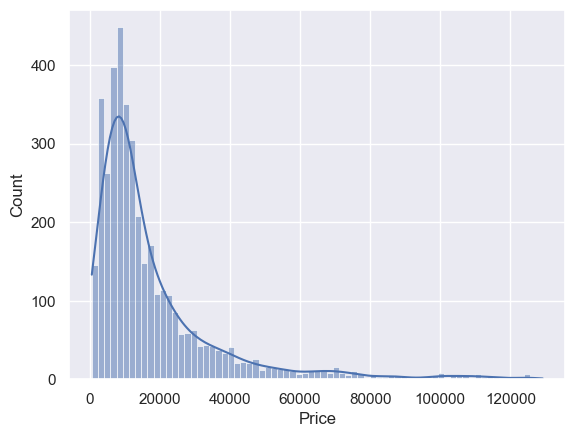

In [58]:
sns.histplot(new_data['Price'],kde=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7088\2813568408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

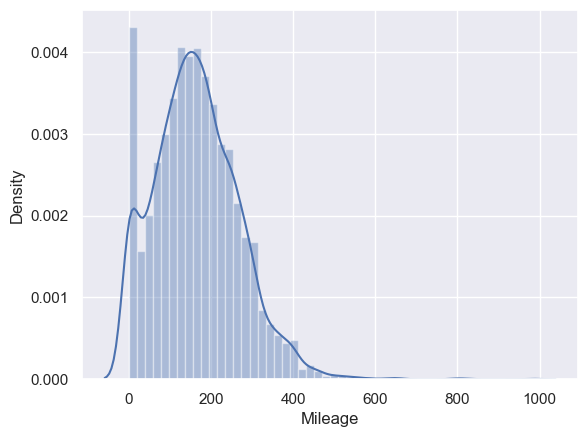

In [60]:
sns.distplot(new_data['Mileage'])

In [61]:
m = new_data['Mileage'].quantile(0.99)
new_data = new_data[new_data['Mileage']<m]
new_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_7088\2813568408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

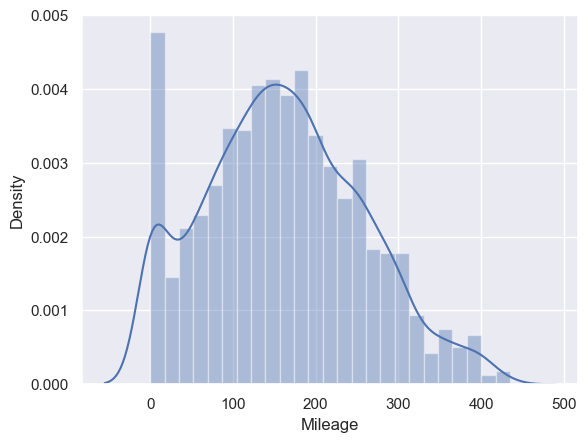

In [62]:
sns.distplot(new_data['Mileage'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_7088\3529399529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

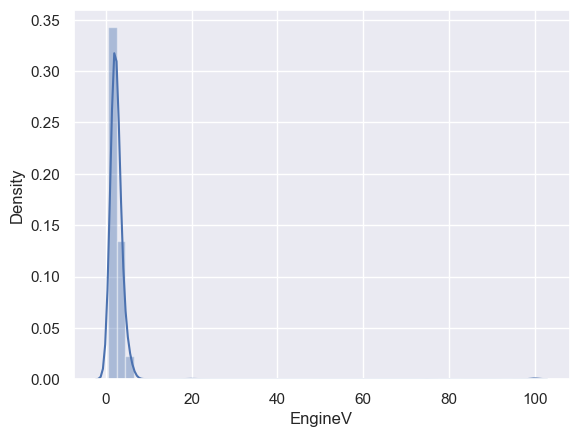

In [64]:
sns.distplot(new_data['EngineV'])

In [66]:
#looking at car engine volume,its normal value should be less than 6.5l

new_data = new_data[new_data['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

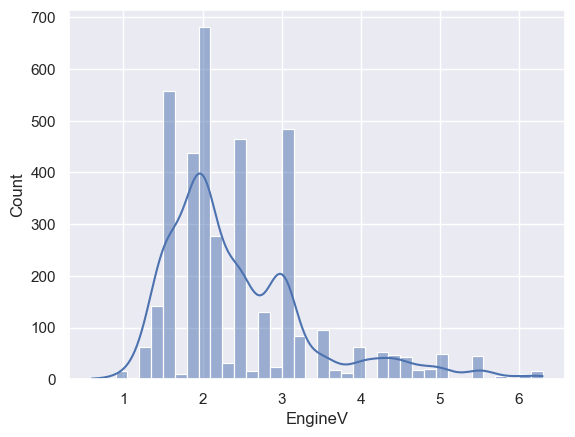

In [68]:
sns.histplot(new_data['EngineV'],kde=True)

In [74]:
# when we deleted few rows above,the index got disturbed,so resetting the index back in order

clean_data = new_data.reset_index(drop=True)

In [76]:
clean_data.shape

(3921, 8)

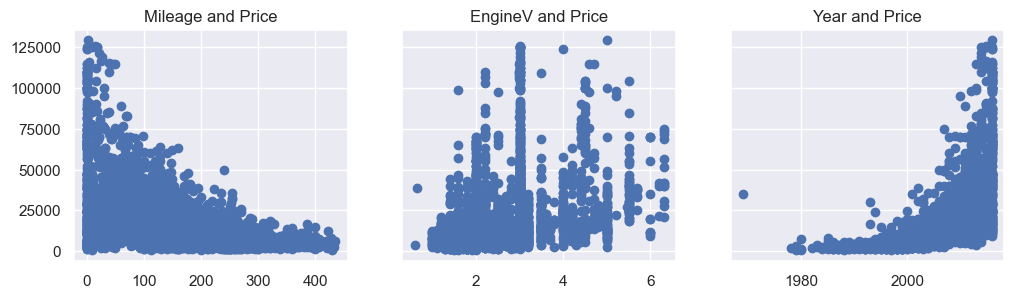

In [85]:
#

fig ,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,3))

ax1.scatter(clean_data['Mileage'],clean_data['Price'])
ax1.set_title('Mileage and Price')

ax2.scatter(clean_data['EngineV'],clean_data['Price'])
ax2.set_title('EngineV and Price')

ax3.scatter(clean_data['Year'],clean_data['Price'])
ax3.set_title('Year and Price')

plt.show()

In [90]:
log_price = np.log(clean_data['Price'])
clean_data['Log_Price'] = log_price
clean_data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519


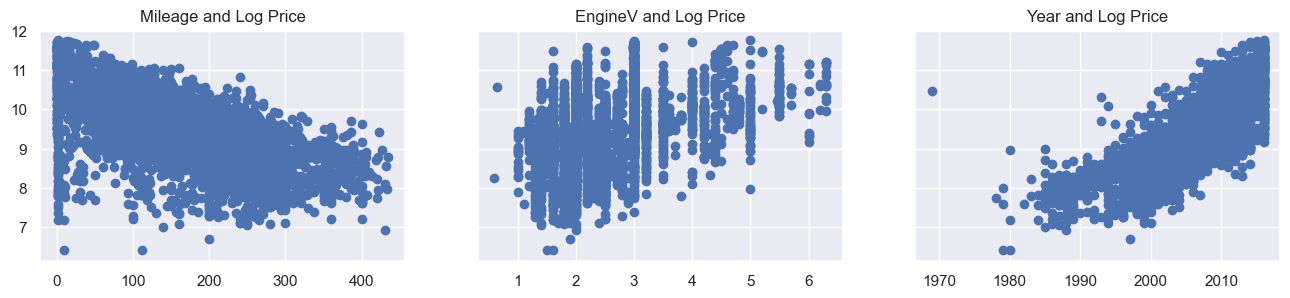

In [92]:
#from the below figure ,we can see a clear linear relationship

fig ,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(16,3))

ax1.scatter(clean_data['Mileage'],clean_data['Log_Price'])
ax1.set_title('Mileage and Log Price')

ax2.scatter(clean_data['EngineV'],clean_data['Log_Price'])
ax2.set_title('EngineV and Log Price')

ax3.scatter(clean_data['Year'],clean_data['Log_Price'])
ax3.set_title('Year and Log Price')

plt.show()

In [124]:
#using Log_Price hencefirth,so dropping the price coulmn
clean_data = clean_data.drop('Price',axis=1)

KeyError: "['Price'] not found in axis"

In [95]:
clean_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


# Multicollinearity

In [96]:
#sklearn does not have any standard libaries to deal with multicollinearity so using statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
variables = clean_data[['Mileage','EngineV','Year']]

In [100]:
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])] 
vif['Features'] = variables.columns
vif

In [ ]:
data_with_no_mulitcollinearity = clean_data.drop(['Year'],axis=1)

In [128]:
data_with_no_mulitcollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3916,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3917,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3918,BMW,sedan,1,3.5,Petrol,yes,8.779557
3919,BMW,sedan,194,2.0,Petrol,yes,8.987197


# Creating Dummmy Variables

In [116]:
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation.
# Hence it reduces the correlations created among dummy variables.

data_with_dummies = pd.get_dummies(data_with_no_mulitcollinearity,drop_first=True)
data_with_dummies

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3917,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3918,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
3919,194,2.0,8.987197,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [120]:
data_with_dummies.columns.values

# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['Log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [129]:
preprocessed_data = data_with_dummies[cols]
preprocessed_data

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3917,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3918,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
3919,8.987197,194,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3917,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3918,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
3919,8.987197,194,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


# Linear Regression Model 

In [132]:
targets = preprocessed_data['Log_Price']
inputs = preprocessed_data.drop(['Log_Price'],axis=1)

In [136]:
# Scaling the inputs

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(inputs)

StandardScaler()

In [139]:
scaled_inputs = sc.transform(inputs)
scaled_inputs

array([[ 1.20471603, -0.46877392,  2.28556547, ..., -0.16342754,
         1.32786051,  0.31892627],
       [ 2.76630482,  0.48252214, -0.43752849, ..., -0.16342754,
        -0.75309115,  0.31892627],
       [ 2.04797398,  2.70221295, -0.43752849, ..., -0.16342754,
        -0.75309115,  0.31892627],
       ...,
       [-1.66860734,  1.11671952,  2.28556547, ..., -0.16342754,
         1.32786051,  0.31892627],
       [ 0.3406369 , -0.46877392,  2.28556547, ..., -0.16342754,
         1.32786051,  0.31892627],
       [-0.38810453, -0.46877392, -0.43752849, ..., -0.16342754,
        -0.75309115,  0.31892627]])

# Train Test Split

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_inputs,targets,train_size=0.8,random_state=365)

# Creating a linear regression Object

In [145]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [146]:
y_hat = reg.predict(x_train)

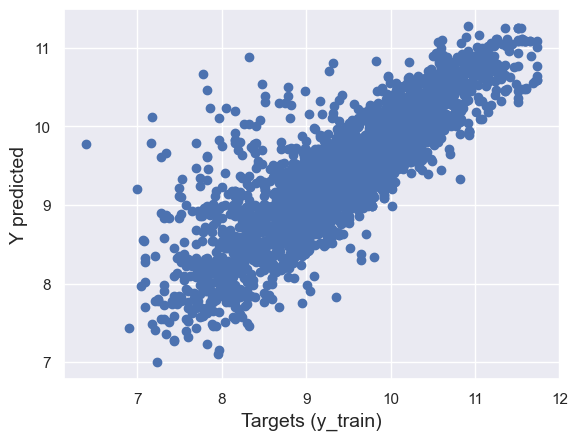

In [147]:
plt.scatter(y_train,y_hat)

plt.xlabel('Targets (y_train)',size=14)
plt.ylabel('Y predicted',size=14)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7088\980077577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

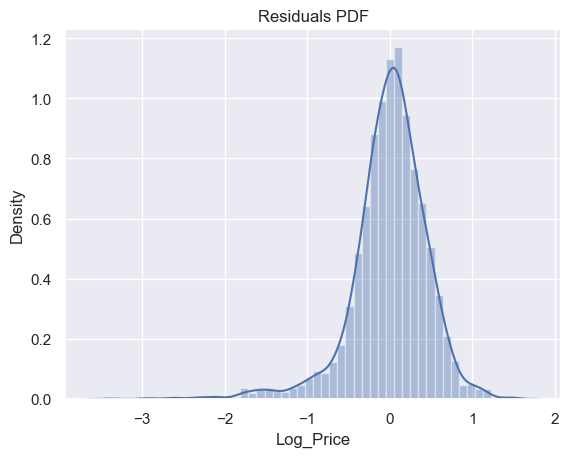

In [149]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF")

In [150]:
#Finding the R-squared
reg.score(x_train,y_train)

0.7262985119939247

In [151]:
# Finding the bias(intercept)
reg.intercept_

9.3945175650554

In [152]:
# finding the weights (coefficients)
reg.coef_

array([-0.45850621,  0.22118353,  0.02385727,  0.01482004, -0.12502118,
       -0.17463561, -0.05054421, -0.08369427, -0.16029143, -0.10388223,
       -0.19829007, -0.12207963, -0.15555148, -0.13027198, -0.03371434,
       -0.15241012,  0.30673013])

In [153]:
summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
summary['Weights'] = reg.coef_

In [154]:
summary

,Features,Weights
0,Mileage,-0.458506
1,EngineV,0.221184
2,Brand_BMW,0.023857
3,Brand_Mercedes-Benz,0.014820
4,Brand_Mitsubishi,-0.125021
5,Brand_Renault,-0.174636
6,Brand_Toyota,-0.050544
7,Brand_Volkswagen,-0.083694
8,Body_hatch,-0.160291
9,Body_other,-0.103882


# Testing the model


In [156]:
yhat_test=reg.predict(x_test)

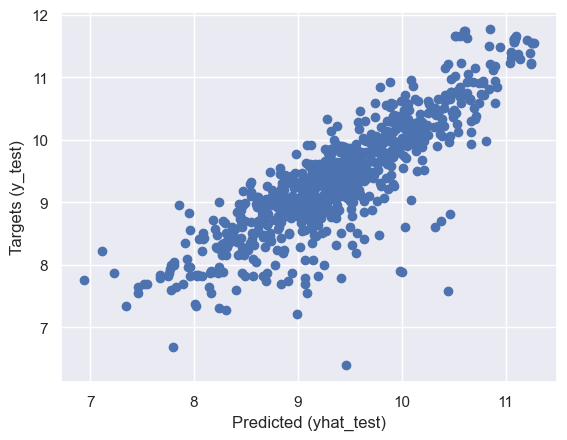

In [159]:
plt.scatter(yhat_test,y_test)
plt.xlabel('Predicted (yhat_test)')
plt.ylabel('Targets (y_test)')
plt.show()

In [160]:
predictions=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
predictions

,Predictions
0,8270.044621
1,19812.912809
2,5356.302504
3,12469.963529
4,5743.341921
...,...
780,11865.232645
781,5484.408240
782,11272.983089
783,9055.168578


In [163]:
predictions['Targets'] = np.exp(y_test)

In [165]:
y_test = y_test.reset_index(drop=True)

In [166]:
predictions['Targets'] = np.exp(y_test)

In [168]:
predictions

,Predictions,Targets
0,8270.044621,7650.0
1,19812.912809,12500.0
2,5356.302504,5000.0
3,12469.963529,8999.0
4,5743.341921,6500.0
...,...,...
780,11865.232645,7750.0
781,5484.408240,7500.0
782,11272.983089,13200.0
783,9055.168578,10900.0


In [169]:
predictions['Residuals'] = predictions['Targets'] - predictions['Predictions']
predictions

,Predictions,Targets,Residuals
0,8270.044621,7650.0,-620.044621
1,19812.912809,12500.0,-7312.912809
2,5356.302504,5000.0,-356.302504
3,12469.963529,8999.0,-3470.963529
4,5743.341921,6500.0,756.658079
...,...,...,...
780,11865.232645,7750.0,-4115.232645
781,5484.408240,7500.0,2015.591760
782,11272.983089,13200.0,1927.016911
783,9055.168578,10900.0,1844.831422


In [172]:
predictions['Difference(%)'] = np.absolute(predictions['Residuals']/predictions['Targets']*100)

In [174]:
pd.options.display.max_rows = 999

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [176]:
predictions.sort_values(by=['Difference(%)'])

,Predictions,Targets,Residuals,Difference(%)
132,7596.92,7600.00,3.08,0.04
589,12416.84,12400.00,-16.84,0.14
317,1552.62,1550.00,-2.62,0.17
194,22653.31,22711.65,58.34,0.26
582,18252.64,18300.00,47.36,0.26
100,42614.43,42500.00,-114.43,0.27
553,4186.16,4200.00,13.84,0.33
270,42648.80,42500.00,-148.80,0.35
543,13546.63,13600.00,53.37,0.39
653,11487.78,11403.99,-83.79,0.73


In [177]:
predictions.to_csv("Car_Price_Prediction_Results.csv")